# A Jupyter notebook where BTC data downloaded from Binance is prepped for traning

In [33]:
# Importing relevant libraries for data management and visualization
# ta library used for technichal analysis indicators

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
import pandas_ta as ta

Data was downloaded from https://www.binance.com/en/landing/data
CSV files from sept2019 to nov2020 where used as it represents an acumulating phase according to the 4 year cycle theory.
I belive that from mid 2023 untill november 2024 there will be a similar accumulation phase for BTC so I decided to train the data with this time period.

In [20]:
# specifying the path to csv files
path = "/home/martin/Downloads"
  
# list of csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty df to store content
btc_df = pd.DataFrame(columns=["date","open","high","low","close","volume","close_time","quote_volume","count","taker_buy_volume",
                         "taker_buy_quote_volume","ignore"])
 
# reading all the csv files in the specified path and appending them to the btc_df
for filename in files:
    df = pd.read_csv(filename, names=["date","open","high","low","close","volume","close_time","quote_volume","count","taker_buy_volume",
                         "taker_buy_quote_volume","ignore"])
    btc_df = pd.concat([btc_df,df])  
btc_df.sort_values(by="date", inplace=True)
btc_df.head()

/tmp/ipykernel_6010/1282923591.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  btc_df = pd.concat([btc_df,df])


,date,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1567296000000,9588.74,9608.80,9579.34,9607.85,75.066945,1567296299999,719990.082021,891,42.693944,409497.287252,0
1,1567296300000,9604.57,9615.45,9594.00,9600.55,70.945642,1567296599999,681419.492632,561,18.906562,181685.336981,0
2,1567296600000,9598.48,9615.19,9598.02,9609.30,36.108642,1567296899999,346962.304284,578,21.347931,205124.153678,0
3,1567296900000,9609.31,9625.00,9609.30,9620.00,85.606839,1567297199999,823295.804760,951,42.620899,409907.741723,0
4,1567297200000,9620.00,9623.73,9608.14,9620.23,38.321111,1567297499999,368555.022540,575,15.023955,144511.599644,0


In [21]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131373 entries, 0 to 8627
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    131373 non-null  object 
 1   open                    131373 non-null  float64
 2   high                    131373 non-null  float64
 3   low                     131373 non-null  float64
 4   close                   131373 non-null  float64
 5   volume                  131373 non-null  float64
 6   close_time              131373 non-null  object 
 7   quote_volume            131373 non-null  float64
 8   count                   131373 non-null  object 
 9   taker_buy_volume        131373 non-null  float64
 10  taker_buy_quote_volume  131373 non-null  float64
 11  ignore                  131373 non-null  object 
dtypes: float64(8), object(4)
memory usage: 13.0+ MB


131,373 data points evrey 5m where gathered.  The date is represented in UNIX time withms unit.  Irrelevant data was dropped from the DF

In [22]:
btc_df["date"] = pd.to_datetime(btc_df["date"],unit='ms')
btc_df = btc_df.set_index('date')
btc_df.drop(["close_time","quote_volume","count","taker_buy_volume","taker_buy_quote_volume","ignore"], axis=1, inplace=True)
btc_df.sort_index(inplace=True)
btc_df.head()

,open,high,low,close,volume
date,,,,,
2019-09-01 00:00:00,9588.74,9608.80,9579.34,9607.85,75.066945
2019-09-01 00:05:00,9604.57,9615.45,9594.00,9600.55,70.945642
2019-09-01 00:10:00,9598.48,9615.19,9598.02,9609.30,36.108642
2019-09-01 00:15:00,9609.31,9625.00,9609.30,9620.00,85.606839
2019-09-01 00:20:00,9620.00,9623.73,9608.14,9620.23,38.321111


To train the models pandas-ta was used to calculate returns and indicators

In [26]:
btc_df.ta.rsi(close='close', length=10, append=True)
rsi_conditions = [
    (btc_df['RSI_10'] > 80),
    (btc_df['RSI_10'] <= 80) & (btc_df['RSI_10'] > 30),
    (btc_df['RSI_10'] <= 30)  
]
rsi_signals=[-1,0,1]
btc_df["rsi_indicator"] = np.select(rsi_conditions,rsi_signals)

btc_df["log_return"] = ta.log_return(close=btc_df["close"])
btc_df.dropna(inplace=True)
"""
btc_df["sma50"] = ta.sma(close=btc_df["close"],length=50)
btc_df["sma200"] = ta.sma(close=btc_df["close"],length=200)
btc_df["SMA_indicator"] = np.where(btc_df['sma50']>btc_df['sma200'], 1, 0)
"""

'\nbtc_df["sma50"] = ta.sma(close=btc_df["close"],length=50)\nbtc_df["sma200"] = ta.sma(close=btc_df["close"],length=200)\nbtc_df["SMA_indicator"] = np.where(btc_df[\'sma50\']>btc_df[\'sma200\'], 1, 0)\n'

In [27]:
btc_df.head(50)

,open,high,low,close,volume,RSI_10,rsi_indicator,log_return
date,,,,,,,,
2019-09-01 01:40:00,9631.60,9640.41,9629.27,9632.67,51.997107,63.841482,0,0.000325
2019-09-01 01:45:00,9630.44,9637.97,9625.00,9625.80,59.317590,47.657728,0,-0.000713
2019-09-01 01:50:00,9625.78,9629.05,9617.24,9617.24,51.697136,35.277079,0,-0.000890
2019-09-01 01:55:00,9619.18,9621.00,9612.08,9614.99,80.086670,32.789317,0,-0.000234
2019-09-01 02:00:00,9614.99,9616.00,9612.09,9615.52,114.672408,34.007360,0,0.000055
2019-09-01 02:05:00,9614.40,9615.99,9610.00,9610.43,24.237566,28.496546,1,-0.000529
2019-09-01 02:10:00,9609.64,9610.33,9601.06,9604.86,40.216940,23.805993,1,-0.000580
2019-09-01 02:15:00,9604.86,9616.00,9603.02,9614.37,34.342723,41.936751,0,0.000990
2019-09-01 02:20:00,9612.68,9614.27,9603.08,9606.12,53.330779,34.112546,0,-0.000858


/home/martin/Documents/python/tradingbot/project_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martin/Documents/python/tradingbot/project_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martin/Documents/python/tradingbot/project_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martin/Documents/python/tradingbot/project_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureW

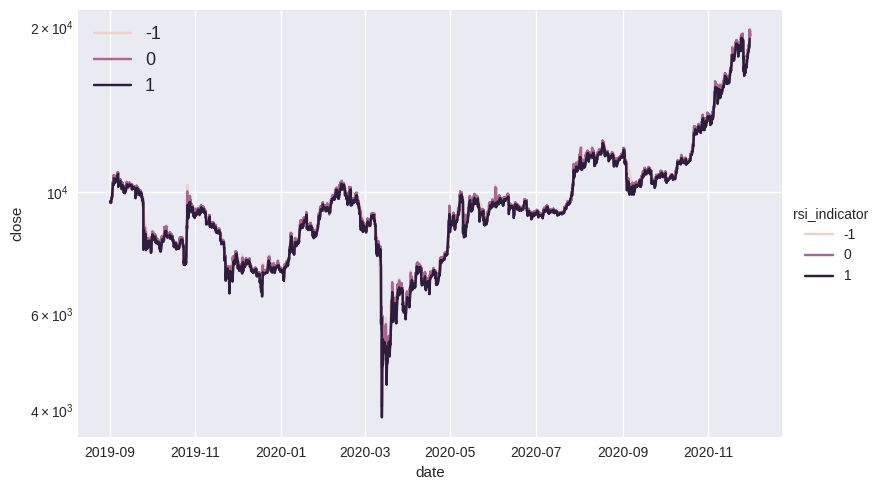

In [37]:
sns.relplot(data=btc_df, x='date', y='close', hue='rsi_indicator',kind="line", aspect=1.61)
plt.legend(fontsize = 13)
plt.yscale("log")
plt.show()

In [8]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)
    
    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.
    
    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)
    
    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average
    
        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0
    
        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))
    
        RSI = scalar * pos_avg / (pos_avg + neg_avg)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify.